##import librabries##

In [92]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##DATA UNDERSTANDING##


In [93]:
df = pd.read_csv('/content/telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
df.shape

(7044, 21)

In [95]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
df.MonthlyCharges.value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
23.65,1
114.70,1
43.65,1


In [97]:
df.TotalCharges.value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


##MISSING VALUES##

In [98]:
df.isnull().sum()

,0
customerID,1
gender,1
SeniorCitizen,1
Partner,1
Dependents,1
tenure,1
PhoneService,1
MultipleLines,1
InternetService,1
OnlineSecurity,1


In [99]:
df.dropna(inplace=True)

In [100]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [101]:
df.shape

(7043, 21)

##OUTLIERS##

THERE WAS NO OUTLIERS

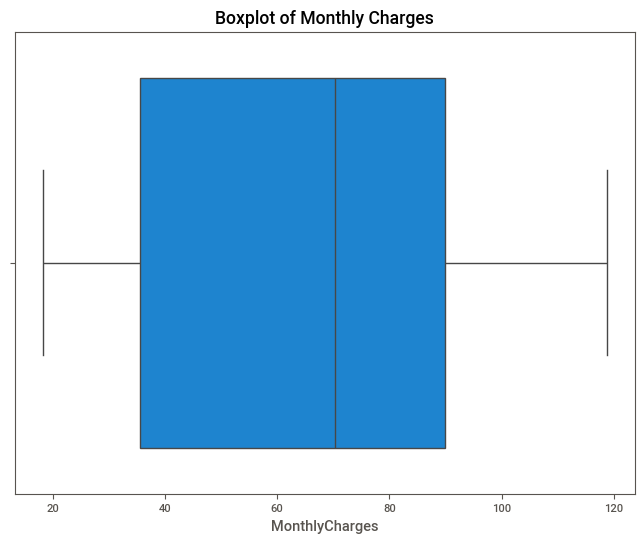

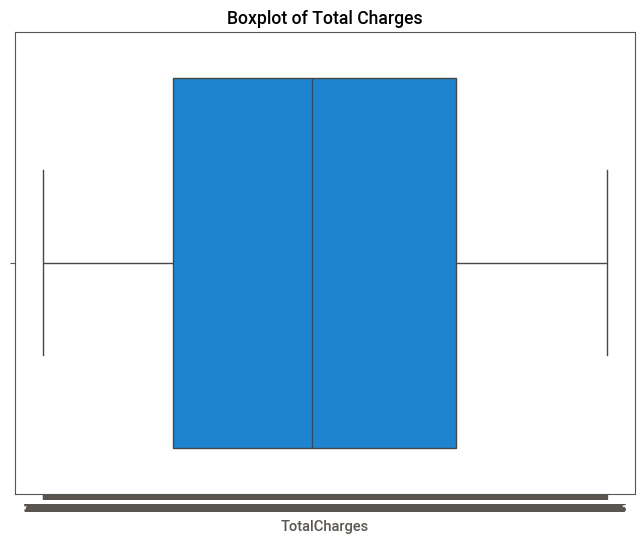

In [102]:

# Create a boxplot to visualize outliers for 'MonthlyCharges'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

# Create a boxplot to visualize outliers for 'TotalCharges'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.show()

In [103]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [105]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

##DUPLICATES##

In [106]:
df.duplicated().sum()

22

In [107]:
df.drop_duplicates()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [108]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


##DATA VISUALIZAATION##

In [110]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [111]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,2544
Male,2619


In [112]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


In [113]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [114]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [115]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=600, bargap=0.1)
fig.show()

In [116]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


In [117]:
color_map = {"Yes": "green", "No": "red"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [118]:
color_map = {"Yes": 'yellow', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [119]:
color_map = {"Yes": 'black', "No": 'blue'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [120]:
color_map = {"Yes": "orange", "No": "purple"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [121]:
color_map = {"Yes": 'green', "No": 'blue'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

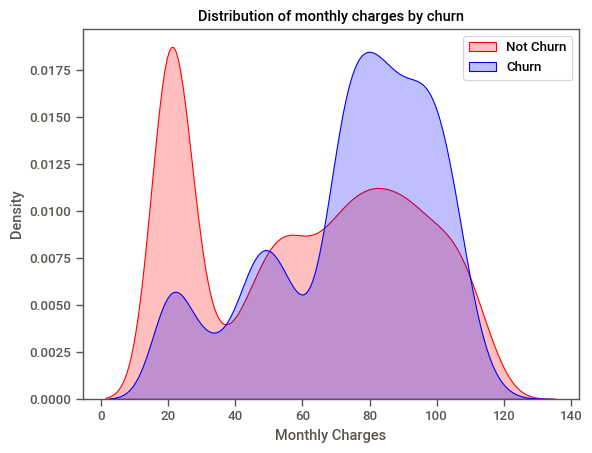

In [122]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

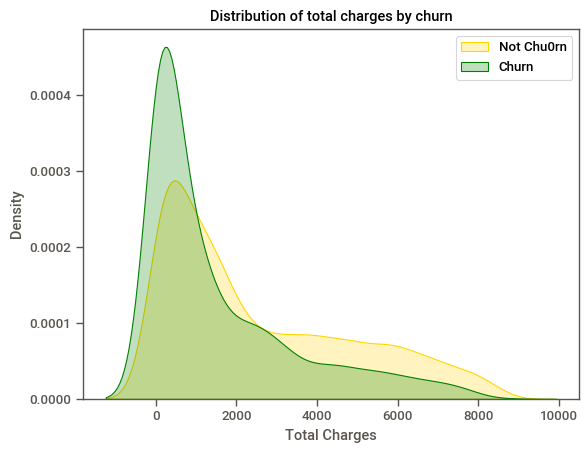

In [124]:
# Convert 'TotalCharges' column to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


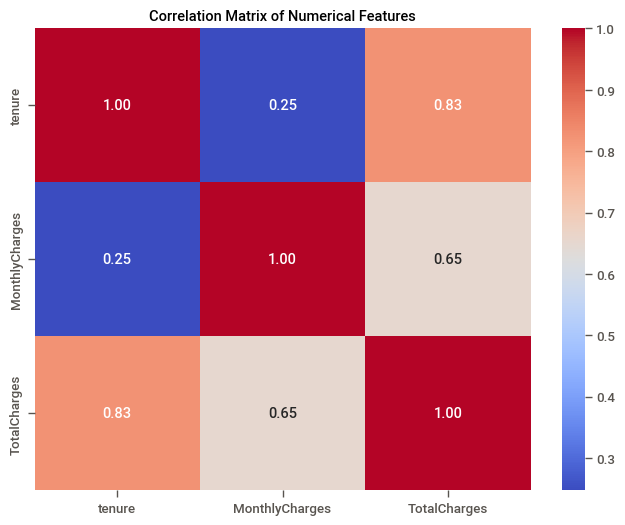

In [125]:
# Define numerical_cols first
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Replace with the actual numerical columns in your dataframe

correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##TRANSFORMING TO NUMERICS##

In [126]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [127]:
!pip install scikit-learn
# Import LabelEncoder from the correct module
from sklearn.preprocessing import LabelEncoder
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [128]:


from sklearn.model_selection import train_test_split

# Assuming 'Churn' is your target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5625, 19) (1407, 19) (5625,) (1407,)


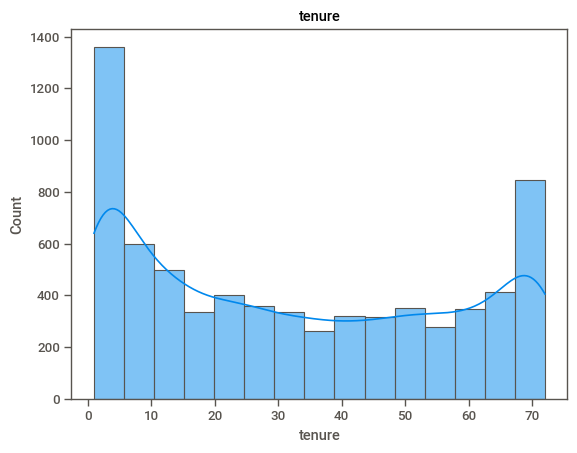

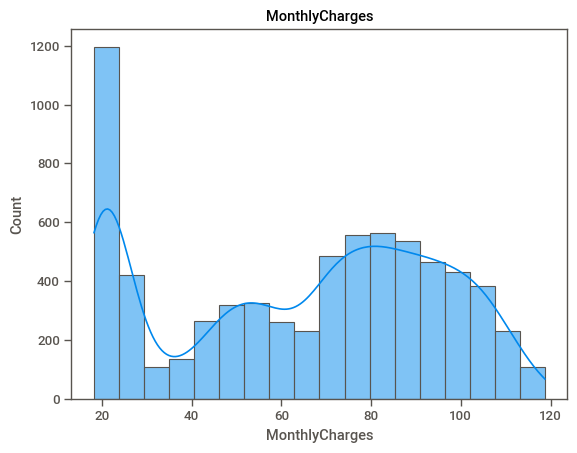

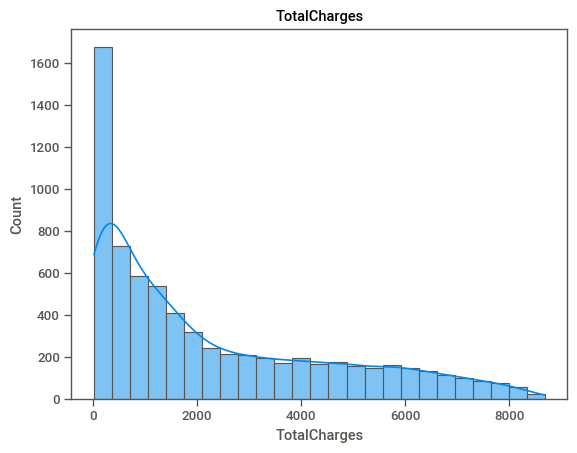

In [129]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    # Use histplot or displot instead of distplot
    sns.histplot(df[feat], kde=True)  # Use kde=True if you want a density curve
    #sns.displot(df, x=feat, kind="kde")  # Alternative using displot
    plt.title(feat)
    plt.show()

##ENCODING

In [130]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

##SCALING

In [131]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [132]:

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create an imputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both train and test data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Now you can proceed with model training
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7654584221748401


In [133]:
from sklearn.metrics import classification_report # Import the classification_report function

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



##apply smote##





In [134]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [135]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train_resampled, y_train_resampled) # Use resampled data
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)

print(classification_report(y_test, predicted_y))

KNN accuracy: 0.6837242359630419
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      1033
           1       0.45      0.79      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.68      0.70      1407



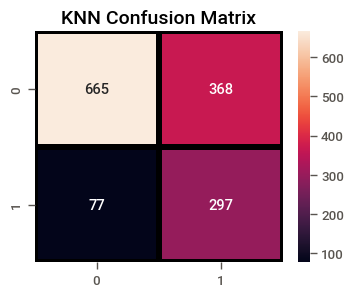

In [136]:
from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, predicted_y)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("KNN Confusion Matrix", fontsize=14)
plt.show()

In [137]:
from sklearn.svm import SVC # Import the SVC class from sklearn.svm

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7945984363894811


In [138]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



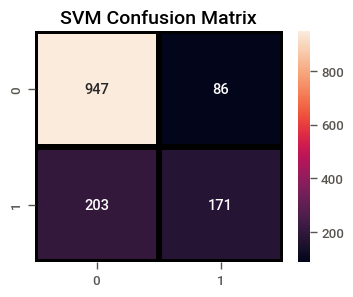

In [139]:
cm = confusion_matrix(y_test, predict_y)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVM Confusion Matrix", fontsize=14)
plt.show()

In [140]:

# Train the SVM model on the resampled data
svc_model = SVC(random_state=1)
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy after SMOTE:", accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy after SMOTE: 0.7398720682302772
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407



In [141]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn import metrics # Import metrics

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt", # Changed 'auto' to 'sqrt'
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7924662402274343


In [142]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



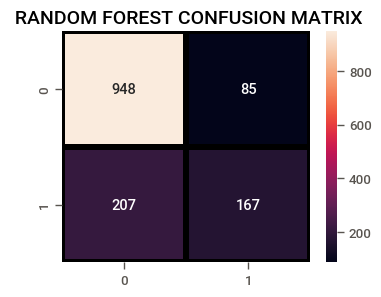

In [143]:
import seaborn as sns
# Import confusion_matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [144]:

# Train the RandomForest model on the resampled data
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.7434257285003554
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.76      1407



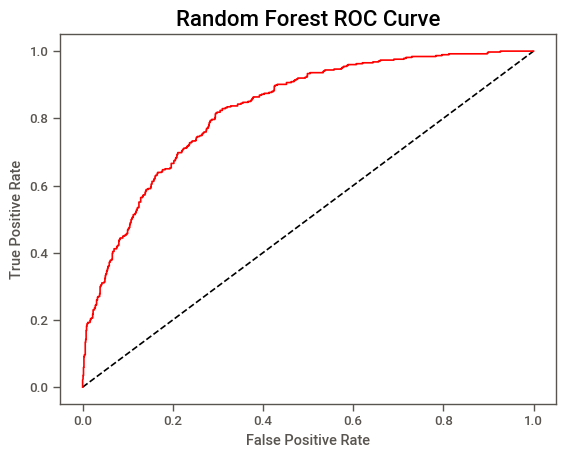

In [145]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [146]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7860696517412935


In [147]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



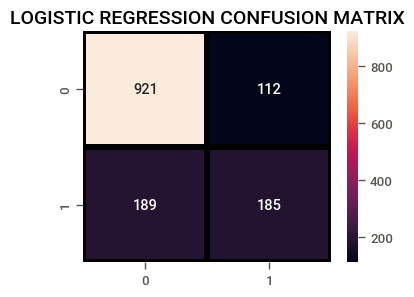

In [148]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [149]:

# Train the Logistic Regression model on the resampled data
lr_model_smote = LogisticRegression()
lr_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
accuracy_lr_smote = lr_model_smote.score(X_test, y_test)
print("Logistic Regression accuracy after SMOTE:", accuracy_lr_smote)
print(classification_report(y_test, lr_model_smote.predict(X_test)))

Logistic Regression accuracy after SMOTE: 0.736318407960199
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [150]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7292110874200426


In [151]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.73      0.73      1407



In [152]:

# Train the Decision Tree model on the resampled data
dt_model_smote = DecisionTreeClassifier()
dt_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
predictdt_y_smote = dt_model_smote.predict(X_test)
accuracy_dt_smote = dt_model_smote.score(X_test, y_test)
print("Decision Tree accuracy after SMOTE:", accuracy_dt_smote)
print(classification_report(y_test, predictdt_y_smote))

Decision Tree accuracy after SMOTE: 0.7221037668798863
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.48      0.53      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



In [153]:

import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.7775408670931059
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [154]:
# Initialize and train the XGBoost model with resampled data
xgb_model_smote = xgb.XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
xgb_predictions_smote = xgb_model_smote.predict(X_test)

# Evaluate the model
xgb_accuracy_smote = xgb_model_smote.score(X_test, y_test)
print("XGBoost Accuracy after SMOTE:", xgb_accuracy_smote)
print(classification_report(y_test, xgb_predictions_smote))

XGBoost Accuracy after SMOTE: 0.7562189054726368
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.53      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.75      0.76      0.76      1407



##HYPERPARAMETER TUNING

In [155]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Example using RandomForestClassifier and RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=50),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of random combinations to try
                                   cv=5,  # Cross-validation folds
                                   scoring='accuracy',  # Or another relevant metric
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_resampled, y_train_resampled) # Use resampled data

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


# Example using GridSearchCV (more computationally expensive, but exhaustive search)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled) # Use resampled data

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_svc_model = grid_search.best_estimator_
y_pred_svc = best_svc_model.predict(X_test)
print(classification_report(y_test, y_pred_svc))

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best score: 0.8518159806295401
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.57      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.8217917675544794
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1033
           1       0.50      0.67      0.57       374

    accuracy                           0.73      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.77      0.73      0.74      1407



In [156]:

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = nb_model.score(X_test, y_test)
print("Naive Bayes accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

Naive Bayes accuracy: 0.7377398720682303
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [157]:

# Initialize and train the Gaussian Naive Bayes model on the resampled data
nb_model_smote = GaussianNB()
nb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_nb_smote = nb_model_smote.predict(X_test)

# Evaluate the model
accuracy_nb_smote = nb_model_smote.score(X_test, y_test)
print("Naive Bayes accuracy after SMOTE:", accuracy_nb_smote)
print(classification_report(y_test, y_pred_nb_smote))

Naive Bayes accuracy after SMOTE: 0.7213930348258707
              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1033
           1       0.48      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



##OTHER BALANCING TECHNIQUES

In [158]:

from imblearn.over_sampling import RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss



# Apply different balancing techniques
balancing_techniques = {
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss()
}

for technique_name, technique in balancing_techniques.items():
    print(f"\nEvaluating with {technique_name}:")
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)

    # Example using RandomForestClassifier (replace with your desired model)
    model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                      random_state=50, max_features="sqrt",
                                      max_leaf_nodes=30)
    model_rf.fit(X_train_resampled, y_train_resampled)
    prediction_test = model_rf.predict(X_test)
    print(metrics.accuracy_score(y_test, prediction_test))
    print(classification_report(y_test, prediction_test))


Evaluating with RandomOverSampler:
0.7398720682302772
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407


Evaluating with ADASYN:
0.7348969438521677
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407


Evaluating with RandomUnderSampler:
0.7348969438521677
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy               

In [ ]:
!pip install ydata-profiling  # Install the necessary library

import pandas as pd
from ydata_profiling import ProfileReport # Import the ProfileReport class


profile = ProfileReport(df, title="Telco Customer Churn - Pandas Profiling Report", explorative=True)
profile.to_file("pandas_profiling_report-projectt 2.html")

In [ ]:
!pip install sweetviz

import sweetviz as sv

# Generate the Sweetviz report
report = sv.analyze(df)
report.show_html('sweetviz_report datascience.html')

Random Forest often performs well in classification tasks, including churn prediction, due to several advantages in handling complex datasets like the Telco Customer Churn dataset. Here’s why Random Forest might yield the highest predictive accuracy with this dataset:

1.Ensemble Method Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. By aggregating the output from numerous decision trees, it reduces the risk of overfitting, which can be common with individual decision trees. This approach typically improves the robustness and generalizability of the model, resulting in better performance on new data.

2.Handling Non-Linear Relationships The Telco Customer Churn dataset likely contains non-linear relationships between features (e.g., Monthly Charges, Tenure, Payment Method) and the target variable (Churn). Random Forest, being a collection of decision trees, is naturally adept at capturing these non-linear patterns without requiring explicit feature transformations or engineering.

3.Feature Importance and Automatic Selection Random Forest assigns importance to each feature based on how well it contributes to the prediction. This means it automatically gives more weight to the most important features, potentially filtering out irrelevant features that might cause noise. For churn prediction, features like MonthlyCharges, Contract, Tenure, and PaymentMethod are likely significant, and Random Forest can leverage them effectively.

4.Handles Missing Values and Categorical Data Decision trees within the Random Forest can handle missing data and categorical variables relatively well. In many cases, Random Forests can split data based on subsets of values in categorical features, which can be useful when dealing with features like InternetService or PaymentMethod in the Telco dataset.

Works Well with Imbalanced Data If the dataset is imbalanced (e.g., fewer customers churn compared to those who do not), Random Forest can still perform effectively. It achieves this by training multiple trees that capture the minority class better, thus improving predictive performance on both churned and non-churned customers.

5.Reduced Overfitting Random Forest’s use of random feature selection and multiple trees significantly reduces overfitting compared to a single decision tree. Overfitting is especially problematic with complex datasets, where a model might memorize training data rather than learn patterns. By averaging out the predictions, Random Forest achieves a balance between bias and variance, leading to better generalization.

6.Robust to Outliers and Noise Random Forests are relatively robust to outliers because each tree is built on a different bootstrap sample and may not include the outliers. Outliers in monthly charges, tenure, or other variables in the Telco dataset, for instance, may not affect all trees, thus reducing their impact on the overall model performance.